<a href="https://colab.research.google.com/github/Arslanbaig84/eda/blob/main/bike_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')

In [ ]:
df.head()df

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [ ]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

df['Education_Rank'] = df['Education'].map({'Partial High School':0, 'High School':1, 'Partial College':2, 'Bachelors':3, 'Graduate Degree':4})

In [ ]:
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,Education_Rank
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,3
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,3
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,3
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No,3
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No,3


In [ ]:
df.Education_Rank

,Education_Rank
0,3
1,3
2,3
3,3
4,3
...,...
995,0
996,0
997,0
998,0


In [ ]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike', 'Education_Rank'],
      dtype='object')

<ipython-input-34-428d8e3fe5b0>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=40);


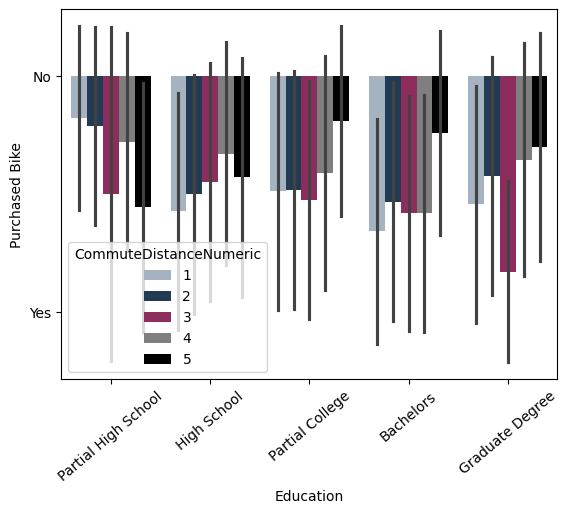

In [ ]:
colors = ['#a1b3c5', '#1a3b5c', '#9d1d5d', '#7f7f7f', '#010101']
viz = sns.barplot(x=df['Education'], y=df['Purchased Bike'], order=['Partial High School',  'High School', 'Partial College', 'Bachelors', 'Graduate Degree'], hue=df['CommuteDistanceNumeric'], palette=colors, errorbar='sd');
viz.set_xticklabels(viz.get_xticklabels(), rotation=40);
plt.show()

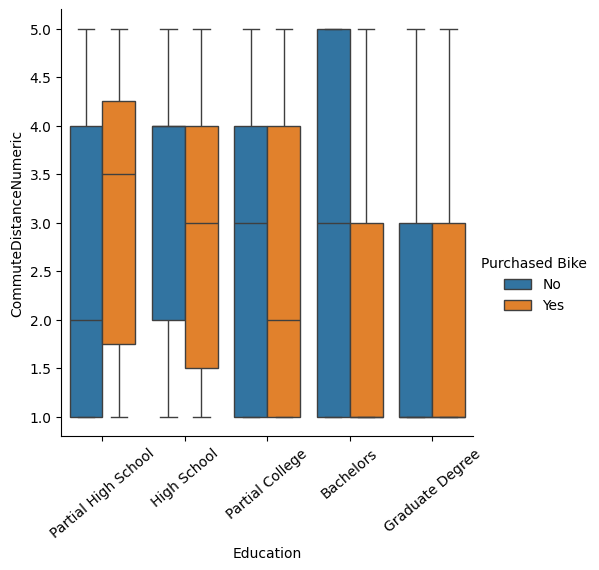

In [ ]:
colors = ['#a1b3c5', '#1a3b5c', '#9d1d5d', '#7f7f7f', '#010101']
viz = sns.catplot(data=df, x='Education', y='CommuteDistanceNumeric', order=['Partial High School',  'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                  hue='Purchased Bike', errorbar='sd', kind='box');
viz.set_xticklabels(rotation=40);

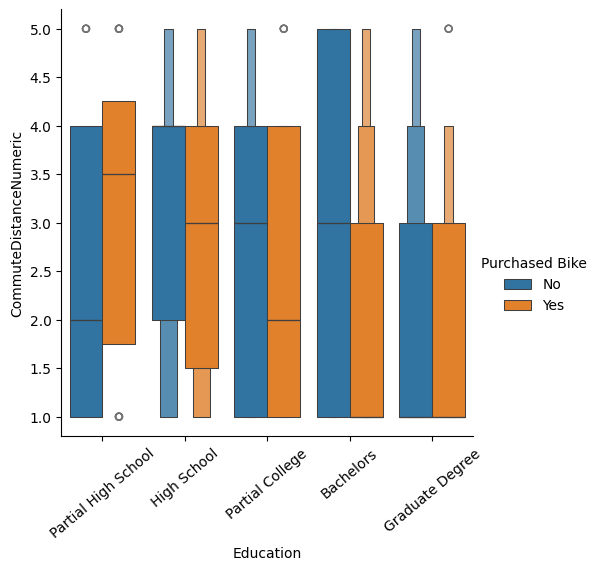

In [ ]:
viz = sns.catplot(data=df, x='Education', y='CommuteDistanceNumeric', order=['Partial High School',  'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                  hue='Purchased Bike', errorbar='sd', kind='boxen');
viz.set_xticklabels(rotation=40);

In [ ]:


feature = 'Education'
label = 'PurchaseBikeNumeric'


groups = df[feature].unique()
grouped_values = []
for group in groups:
  grouped_values.append(df[df[feature] == group][label])

F, p = stats.f_oneway(*grouped_values)
print(f'F: {F}, p: {p}')

F: 6.465288388710145, p: 3.8877233994112315e-05


In [ ]:
r, pp = stats.pearsonr(df['Education_Rank'], df['PurchaseBikeNumeric'])
print(f'r: {r}, p: {pp}')

r: 0.1407580442339139, p: 7.90080646029121e-06


In [ ]:
def statss(feature, label):
  from scipy import stats
  groups = df[feature].unique()
  grouped_values = []
  for group in groups:
    grouped_values.append(df[df[feature] == group][label])

  f, p = stats.f_oneway(*grouped_values)

  r, pp = stats.pearsonr(df['Education_Rank'], df['PurchaseBikeNumeric'])
  print(f"f: {f}, p_stat: {p}, r: {r}, p_pearson: {pp}")


In [ ]:
statss('Education', 'PurchaseBikeNumeric')


f: 6.465288388710145, p_stat: 3.8877233994112315e-05, r: 0.1407580442339139, p_pearson: 7.90080646029121e-06


In [ ]:
statss('Age', 'PurchaseBikeNumeric')


f: 2.6266476038676827, p_stat: 9.651221969737074e-09, r: 0.1407580442339139, p_pearson: 7.90080646029121e-06


In [ ]:
statss('HomeOwnerNumeric', 'PurchaseBikeNumeric')


f: 0.3728241927773673, p_stat: 0.5416078733889576, r: 0.1407580442339139, p_pearson: 7.90080646029121e-06


In [ ]:
statss('MaritalStatusNumeric', 'PurchaseBikeNumeric')


f: 12.099907374118972, p_stat: 0.000526009072983177, r: 0.1407580442339139, p_pearson: 7.90080646029121e-06


In [ ]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['PurchaseBikeNumeric'], df['Education'])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2       meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
      Bachelors     Graduate Degree  -0.0121  0.999 -0.1404  0.1163  False
      Bachelors         High School  -0.1109 0.1204 -0.2381  0.0162  False
      Bachelors     Partial College  -0.1032 0.0942 -0.2166  0.0102  False
      Bachelors Partial High School  -0.2891 0.0001 -0.4623 -0.1159   True
Graduate Degree         High School  -0.0989 0.3297 -0.2428   0.045  False
Graduate Degree     Partial College  -0.0912 0.3236  -0.223  0.0407  False
Graduate Degree Partial High School  -0.2771 0.0005 -0.4629 -0.0913   True
    High School     Partial College   0.0077 0.9998  -0.123  0.1385  False
    High School Partial High School  -0.1782 0.0655 -0.3632  0.0068  False
Partial College Partial High School  -0.1859 0.0322 -0.3617 -0.0101   True
-------------------------

In [ ]:
edu_types = df.Education.unique()
ttestresults= []
from scipy.stats import stats

for i, e in enumerate(edu_types):
  for i2, e2 in enumerate(edu_types):
    if i2 > i:
      t, p = stats.ttest_ind(df[df.Education == e].PurchaseBikeNumeric, df[df.Education == e2].PurchaseBikeNumeric)
      ttestresults.append([f'{e}-{e2}:', t.round(4), p.round(4)])
#      print(f'{e}-{e2}: {t.round(4)}, {p.round(4)}')
#print(ttestresults)

threshold = 0.05 / len(ttestresults)
for t in ttestresults:
  if t[2] < threshold:
    print(f'{t[0]} is statistically significant with values {t[1]} and {t[2]}')

Bachelors-Partial High School: is statistically significant with values 4.6253 and 0.0
Graduate Degree-Partial High School: is statistically significant with values 4.1685 and 0.0
Partial College-Partial High School: is statistically significant with values 2.9354 and 0.0036


<ipython-input-10-052a197a8550>:8: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t, p = stats.ttest_ind(df[df.Education == e].PurchaseBikeNumeric, df[df.Education == e2].PurchaseBikeNumeric)
